In [1]:
# LICENCE - LICENSE
# Projet QualiFHIR
# Comité d'éthique : G2-2024-E012
# Code Python - Copyright (c) 2025-2026 Dr. Marie DETRAIT at Grand Hôpital de Charleroi
# This script is not intended for sale. 
# Additional Requirements:
# You may not modify the work.
# Any derivative work of this script must include a citation of the original author in any version distributed or publicly displayed of the derivative work.
# Any new work based on this script must be discussed with the author.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(1)
sns.set_style("darkgrid")
tfont = {'fontsize':15, 'fontweight':'bold'}
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn import set_config
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score,StratifiedKFold
from sklearn .metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics 
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_fscore_support as score,roc_auc_score

In [3]:
# Détection de la fragilité gériatrique 

In [4]:
# import fichier = dataset pour l'entrainement avec 160 observations patients

In [6]:
# import fichier avec la cohorte externe des 4 patients ( statut de fragilité connu mais non indiqué pour test)

In [8]:
data.columns

Index(['my_ID', 'age', 'CAT_age', 'statut_social', 'etat_civil',
       'conditions_vie', 'nuit', 'necessite_adaptation_lieu_vie',
       'aides au quotidien (maison)', 'réseau present', 'administration ',
       'provenance', 'hospit', 'hospit_recente', 'ho/fe', 'motif',
       'DIAG_par_SYST', 'diag_P', 'passage USI', 'motif USI', 'syndrome_G',
       'maladie_memoire', 'confusion aigue', 'polymédication',
       'motricité_alteree', 'equilibre_alteré', 'F_muscu', 'marche', 'chute',
       'vision', 'audition', 'grabataire', 'obésité', 'surpoids',
       'denutrition', 'psy', 'Tr humeur', 'anxiété', 'fatigue',
       'somnolence diurne', 'motivation', 'MMSE', 'cat_MMSE',
       'nbre années école', 'cat_a_etude', 'FCT cog', 'perte autonomie',
       'incontinence U', 'incontinence I', 'co-mob', 'niveau comob',
       'NV_RISQUE', 'infectieux', 'neuro', 'endoc', 'respi',
       'vasculaire periph', 'denutrition_bis', 'cardio', 'nephro',
       'patho maligne', 'rhumato', 'apprentissag

In [9]:
data[data==np.inf]=np.nan

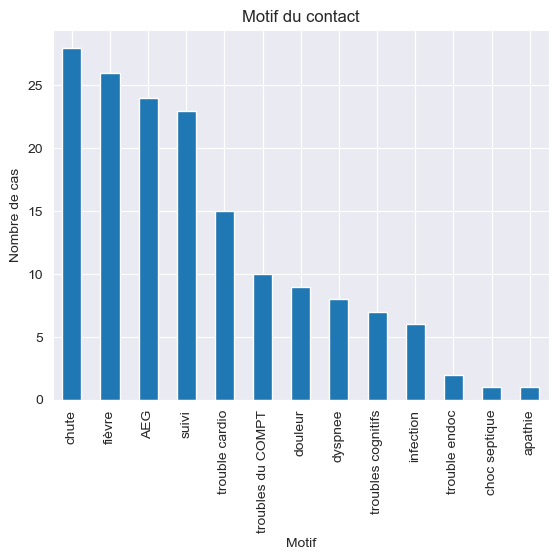

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

counts = data['motif'].value_counts()

counts.plot(kind='bar')

plt.title("Motif du contact")
plt.xlabel("Motif")
plt.ylabel("Nombre de cas")
plt.show()

In [37]:
data['ho/fe'].value_counts()

ho/fe
femme    89
homme    71
Name: count, dtype: int64

In [43]:
data['fragilité'].value_counts()

fragilité
eleve     112
faible     48
Name: count, dtype: int64

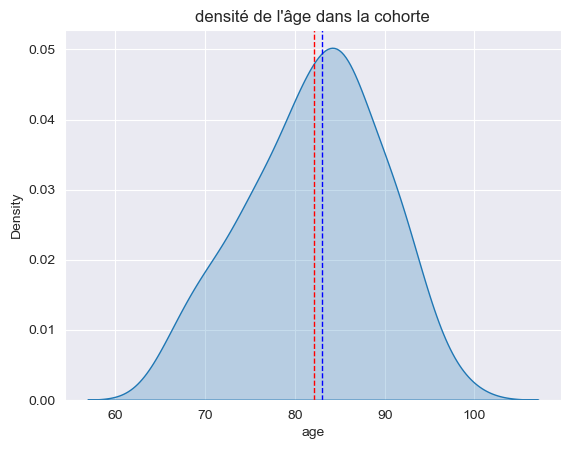

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que vous ayez un DataFrame appelé df et une colonne 'colonne_a_afficher'
# Utilisez sns.kdeplot pour afficher la densité
sns.kdeplot(data['age'], fill=True)

# Calculer la moyenne et la médiane
moyenne = data['age'].mean()
median = data['age'].median()

# Ajouter une ligne verticale pour la moyenne
plt.axvline(moyenne, color='red', linestyle='dashed', linewidth=1, label=f'Moyenne: {moyenne:.2f}')

# Ajouter une ligne verticale pour la médiane
plt.axvline(median, color='blue', linestyle='dashed', linewidth=1, label=f'Médiane: {median:.2f}')

# Ajouter une légende
plt.title("densité de l'âge dans la cohorte")

# Afficher le graphique
plt.show()


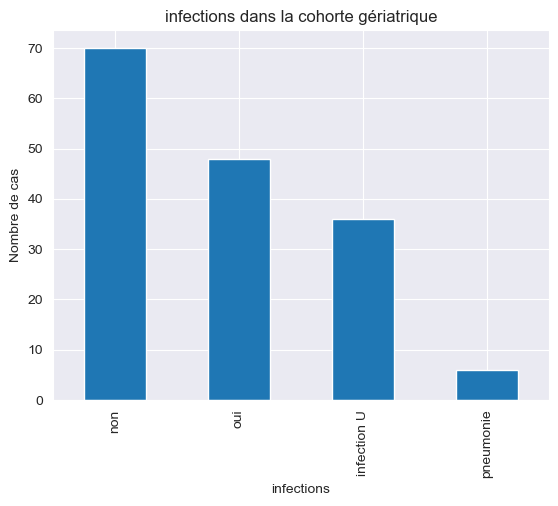

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

counts = data['infectieux'].value_counts()

counts.plot(kind='bar')

plt.title("infections dans la cohorte gériatrique")
plt.xlabel("infections")
plt.ylabel("Nombre de cas")
plt.show()

In [355]:
X = data.drop(columns="fragilité")
y = data["fragilité"]

In [356]:
X_bis = df.drop(columns="fragilité")
y_bis = df["fragilité"]

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [358]:
# XGBOOST: algorithme : L'algorithme XGBoost utilise une forme plus régularisée du boosting de gradient avec des performances élevées. 
# Cet algorithme est basé sur des arbres de décision et des méthodes d'ensemble séquentielles également connues sous le nom de "boosting" 
# qui tentent de corriger les erreurs du modèle précédant à l'intérieur de la séquence. 

In [359]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xgb_model = xgb.XGBClassifier

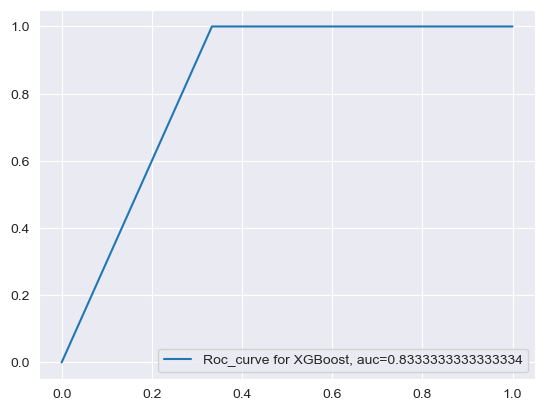

In [364]:
fpr,tpr, _ =metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr, label="Roc_curve for XGBoost, auc=" +str(auc))
plt.legend()
plt.show()

In [365]:
from sklearn import metrics

In [366]:
import sklearn.metrics

In [367]:
sklearn.metrics.f1_score(y_test, y_pred, average="macro")

0.8545454545454545

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.83      1.00      0.91        20

    accuracy                           0.88        32
   macro avg       0.92      0.83      0.85        32
weighted avg       0.90      0.88      0.87        32



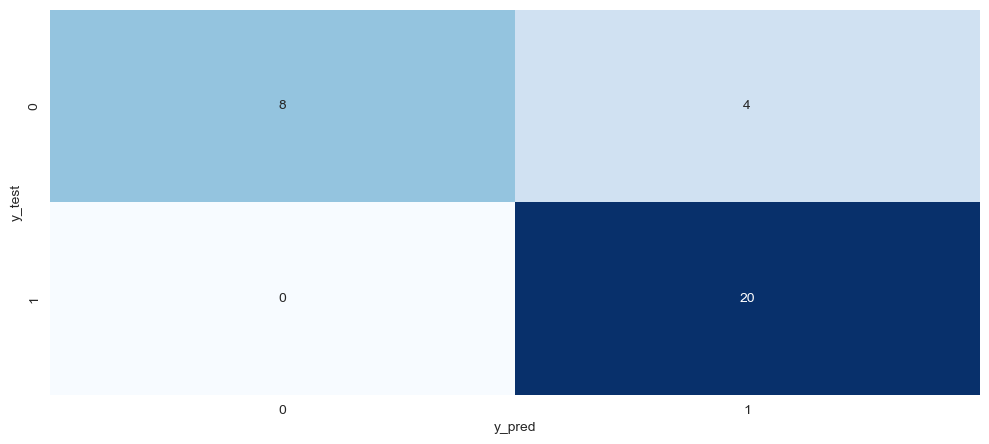

In [368]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
sns.heatmap(cm, annot=True, cbar=False, cmap='Blues')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [361]:
best_model = grid_search.best_estimator_

In [362]:
y_pred = best_model.predict(X_bis)

In [363]:
y_pred

array([0, 1, 1, 1])

In [364]:
pred_trois_patients = best_model.predict_proba(X_bis)

In [365]:
pred_trois_patients

array([[0.608955  , 0.391045  ],
       [0.15220642, 0.8477936 ],
       [0.16138893, 0.83861107],
       [0.1470381 , 0.8529619 ]], dtype=float32)

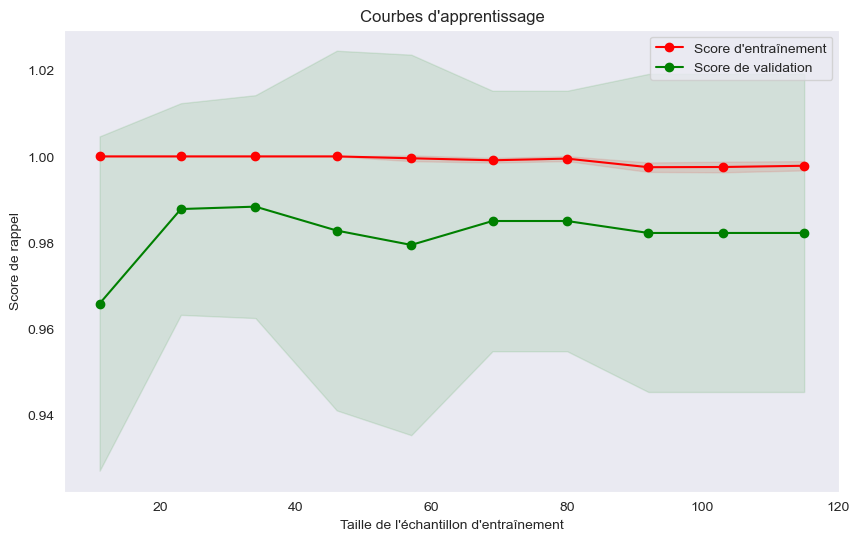

In [367]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Calcul des courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train,
                                                        cv=10, scoring='roc_auc',
                                                        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcul des moyennes et des écarts-types des scores d'entraînement et de validation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracé des courbes d'apprentissage
plt.figure(figsize=(10, 6))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")

plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Score de rappel")
plt.title("Courbes d'apprentissage")
plt.legend(loc="best")
plt.show()

In [ ]:
# eplicabilité avec LIME

In [368]:
from lime.lime_tabular import LimeTabularExplainer

In [369]:
#Utiliser LIME pour expliquer les prédictions du modèle
import lime
import lime.lime_tabular
import numpy as np


explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,  # Convertir en numpy array si nécessaire
    feature_names=X_train.columns,  # Les noms des colonnes/features
    class_names=['Non Fragile', 'Fragile'],  # Les noms des classes
    verbose=True,
    mode='classification'
)

# Sélectionner une observation de test à expliquer

i = 1  # par exemple, deuxième observation dans X_bis ( vérité = fragile)
observation = X_bis.iloc[i].values  # Convertir en numpy array si nécessaire

# Créer l'explication pour une observation
exp = explainer.explain_instance(observation, grid_search.best_estimator_.predict_proba, num_features=10)

# Afficher les résultats de l'explication
exp.show_in_notebook(show_all=False)

Intercept 0.5428782294213056
Prediction_local [0.86456218]
Right: 0.8477936


In [379]:
import pickle

In [380]:
# Sauvegardez le modèle dans un fichier
with open('model.pickle', 'wb') as fichier:
    pickle.dump(best_model, fichier)

In [ ]:
# 2ème partie : réseau de neurones simple avec keras et tensorflow   
# petit modèle séquentiel

In [ ]:
# modèle linéaire de couches empilées, où chaque couche a exactement une entrée et une sortie, connectées les unes à la suite des autres.
# j'empile les couches dans l’ordre, les données traversent ainsi les couches dans un seul flux direct.
# Parfait pour des modèles simples de classification ou régression
# Ce modèle ne permet pas de structures complexes (comme plusieurs entrées ou sorties). 

In [370]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [371]:
X = data.drop(columns="fragilité")
y = data["fragilité"]

In [372]:
X_bis = df.drop(columns="fragilité")
y_bis = df["fragilité"]

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
model = Sequential()

In [375]:
# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=30, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6605 - loss: 1.5459 - val_accuracy: 0.5938 - val_loss: 0.5703
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6624 - loss: 0.5899 - val_accuracy: 0.6562 - val_loss: 0.5321
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6723 - loss: 0.4942 - val_accuracy: 0.6250 - val_loss: 0.5100
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7368 - loss: 0.4774 - val_accuracy: 0.6250 - val_loss: 0.4843
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7533 - loss: 0.4314 - val_accuracy: 0.6562 - val_loss: 0.4671
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7776 - loss: 0.3824 - val_accuracy: 0.7500 - val_loss: 0.4522
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8434 - loss: 0.3628 - val_accuracy: 0.8125 - val_loss: 0.4334
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7540 - loss: 0.3664 - val_accuracy: 0.8125 - val_loss

In [376]:
# Prédire sur l'ensemble de test
predictions = (model.predict(X_test) > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [388]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[10  2]
 [ 0 20]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.91      1.00      0.95        20

    accuracy                           0.94        32
   macro avg       0.95      0.92      0.93        32
weighted avg       0.94      0.94      0.94        32



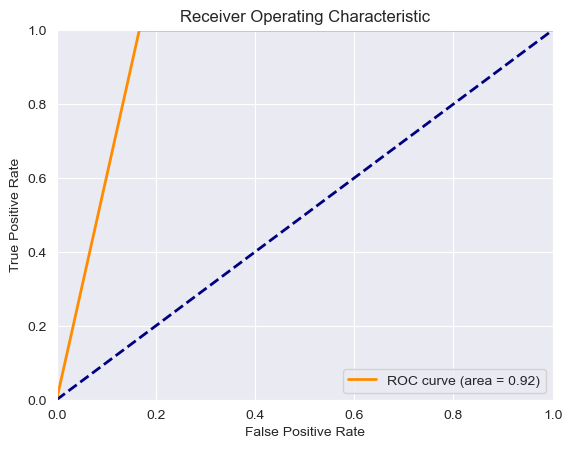

In [389]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [390]:
sklearn.metrics.f1_score(y_test, predictions, average="macro")

0.9307359307359306

In [377]:
pred = (model.predict(X_bis) > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [378]:
pred

array([[0],
       [1],
       [1],
       [1]])

In [379]:
from lime.lime_tabular import LimeTabularExplainer

In [380]:
import lime
import lime.lime_tabular
import numpy as np

def predict_proba(X):
    proba_class_1 = model.predict(X)
    proba_class_0 = 1 - proba_class_1
    return np.hstack((proba_class_0, proba_class_1))

# explainer LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Non fragile', 'Fragile'],  
    mode='classification')


# Expliquer une prédiction spécifique : premier patient du fichier  (vérité = non fragile)
exp = explainer.explain_instance(X_bis.iloc[0], predict_proba)

exp.show_in_notebook(show_table=True)

C:\Users\dema58815\AppData\Local\anaconda3Bis\envs\summer_school_text_mining\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\dema58815\AppData\Local\anaconda3Bis\envs\summer_school_text_mining\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\dema58815\AppData\Local\anaconda3Bis\envs\summer_school_text_mining\lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as posit

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step 


C:\Users\dema58815\AppData\Local\anaconda3Bis\envs\summer_school_text_mining\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\dema58815\AppData\Local\anaconda3Bis\envs\summer_school_text_mining\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\dema58815\AppData\Local\anaconda3Bis\envs\summer_school_text_mining\lib\site-packages\lime\lime_tabular.py:427: FutureWarning: Series.__getitem__ treating keys as posit

In [ ]:
# FIN